In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from random import choices, sample
from gensim.models import Word2Vec
import gc
pd.set_option('display.float_format',lambda x : '%.2f' % x)
from math import log10

In [2]:
with open('./lt_df_Ali_8days.pkl', 'rb') as file:
    lt_df = pickle.load(file)

In [3]:
lt_df[0].columns

Index(['uid', 'hist_iid', 'hist_cid', 'target_iid', 'target_cid', 'next_iid',
       'next_cid', 'knn_rank', 'NN_rank', 'DIN_rank', 'DIEN_rank'],
      dtype='object')

In [4]:
lt_df[0]

,uid,hist_iid,hist_cid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank
0,7,"[980099, 3427154, 2689961, 2292610, 4034225, 5...","[2355072, 4801426, 4756105, 4756105, 3607361, ...",2063176,149192,1793668,2520377,53.00,40,95,45
1,96,"[3005381, 4160584]","[1464116, 3607361]",4160584,3607361,13283,3607361,5.00,7,15,94
2,152,"[842950, 3048082, 3682882]","[4145813, 4181361, 4181361]",3682882,4181361,3739757,4181361,6.00,6,45,18
3,239,"[709710, 4826455, 709710, 1992230, 1842641, 45...","[1787510, 1787510, 1787510, 2465336, 2976589, ...",5030834,1787510,24834,1787510,28.00,16,89,11
4,339,"[3437026, 3523692, 1850821, 1687195, 2487310, ...","[3738615, 2558244, 4756105, 4022701, 3738615, ...",222342,4244487,1692072,4244487,4.00,1,50,61
...,...,...,...,...,...,...,...,...,...,...,...
14738,1017455,"[3878908, 2029728, 4877816, 4736367, 1387695]","[982926, 149192, 4801426, 5042232, 4756105]",1387695,4756105,1584827,4756105,2.00,24,10,20
14739,1017559,"[969064, 7521, 1367959, 812391, 4257874]","[903809, 903809, 903809, 903809, 903809]",4257874,903809,2736720,903809,34.00,80,40,39
14740,1017591,"[777173, 2503250, 4551433]","[2885642, 2885642, 2885642]",4551433,2885642,2157244,2885642,38.00,91,3,51
14741,1017830,"[2382143, 964233, 310906, 4676590]","[4801426, 4801426, 4801426, 2096639]",4676590,2096639,2609472,2096639,97.00,67,51,30


In [5]:
def gen_label(df):
    if df.knn_rank <= df.NN_rank and  df.knn_rank <= df.DIN_rank and df.knn_rank <= df.DIEN_rank:
        label = 0
    elif df.NN_rank <= df.knn_rank and  df.NN_rank <= df.DIN_rank and df.NN_rank <= df.DIEN_rank:
        label = 1
    elif df.DIN_rank <= df.knn_rank and  df.DIN_rank <= df.NN_rank and df.DIN_rank <= df.DIEN_rank:
        label = 2
    elif df.DIEN_rank <= df.knn_rank and  df.DIEN_rank <= df.NN_rank and df.DIEN_rank <= df.DIN_rank:
        label = 3
    return label

In [6]:
for df in tqdm(lt_df):
    df['label'] = df.apply(gen_label, axis=1)

100%|██████████| 8/8 [00:09<00:00,  1.14s/it]


In [7]:
for df in tqdm(lt_df):
    df['hist_len'] = df.apply(lambda df: len(eval(str(df['hist_iid']))), axis=1)

100%|██████████| 8/8 [00:03<00:00,  2.44it/s]


In [8]:
from keras.utils import to_categorical
for df in tqdm(lt_df):
    df['train_label'] = df.apply(lambda df: to_categorical(df['label'], num_classes=4), axis=1)

Using TensorFlow backend.
100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


In [9]:
lt_df[0]

,uid,hist_iid,hist_cid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len,train_label
0,7,"[980099, 3427154, 2689961, 2292610, 4034225, 5...","[2355072, 4801426, 4756105, 4756105, 3607361, ...",2063176,149192,1793668,2520377,53.00,40,95,45,1,16,"[0.0, 1.0, 0.0, 0.0]"
1,96,"[3005381, 4160584]","[1464116, 3607361]",4160584,3607361,13283,3607361,5.00,7,15,94,0,2,"[1.0, 0.0, 0.0, 0.0]"
2,152,"[842950, 3048082, 3682882]","[4145813, 4181361, 4181361]",3682882,4181361,3739757,4181361,6.00,6,45,18,0,3,"[1.0, 0.0, 0.0, 0.0]"
3,239,"[709710, 4826455, 709710, 1992230, 1842641, 45...","[1787510, 1787510, 1787510, 2465336, 2976589, ...",5030834,1787510,24834,1787510,28.00,16,89,11,3,66,"[0.0, 0.0, 0.0, 1.0]"
4,339,"[3437026, 3523692, 1850821, 1687195, 2487310, ...","[3738615, 2558244, 4756105, 4022701, 3738615, ...",222342,4244487,1692072,4244487,4.00,1,50,61,1,17,"[0.0, 1.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,1017455,"[3878908, 2029728, 4877816, 4736367, 1387695]","[982926, 149192, 4801426, 5042232, 4756105]",1387695,4756105,1584827,4756105,2.00,24,10,20,0,5,"[1.0, 0.0, 0.0, 0.0]"
14739,1017559,"[969064, 7521, 1367959, 812391, 4257874]","[903809, 903809, 903809, 903809, 903809]",4257874,903809,2736720,903809,34.00,80,40,39,0,5,"[1.0, 0.0, 0.0, 0.0]"
14740,1017591,"[777173, 2503250, 4551433]","[2885642, 2885642, 2885642]",4551433,2885642,2157244,2885642,38.00,91,3,51,2,3,"[0.0, 0.0, 1.0, 0.0]"
14741,1017830,"[2382143, 964233, 310906, 4676590]","[4801426, 4801426, 4801426, 2096639]",4676590,2096639,2609472,2096639,97.00,67,51,30,3,4,"[0.0, 0.0, 0.0, 1.0]"


In [10]:
lt_df[0]['label'].value_counts()

0    5864
1    4598
2    2188
3    2093
Name: label, dtype: int64

In [11]:
lt_df[0][lt_df[0]['label']==0].describe()

,uid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len
count,5864.00,5864.00,5864.00,5864.00,5864.00,5864.00,5864.00,5864.00,5864.00,5864.00,5864.00
mean,504677.91,2562110.83,2697295.08,2551366.06,2664675.37,10.03,34.10,52.81,55.97,0.00,14.62
std,293197.22,1470189.98,1390165.29,1486192.14,1394917.82,11.57,26.69,25.87,26.95,0.00,17.31
min,96.00,1369.00,50601.00,1197.00,5064.00,1.00,1.00,5.00,1.00,0.00,1.00
25%,253680.50,1276070.75,1567637.00,1253693.50,1464116.00,2.00,11.00,32.00,34.00,0.00,3.00
50%,501576.00,2585887.50,2465336.00,2557464.50,2465336.00,5.00,28.00,52.00,57.00,0.00,9.00
75%,755331.00,3835881.25,3776866.00,3853076.00,3749815.00,14.00,52.00,74.00,79.00,0.00,19.00
max,1018006.00,5163006.00,5144469.00,5158324.00,5144469.00,79.00,99.00,99.00,99.00,0.00,203.00


In [12]:
lt_df[0][lt_df[0]['label']==1].describe()

,uid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len
count,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00,4598.00
mean,496190.39,2595916.27,2676616.94,2564049.55,2687781.60,37.84,11.80,52.49,56.10,1.00,15.17
std,294693.85,1467881.39,1402112.69,1462228.64,1389176.07,26.86,12.31,27.18,26.39,0.00,18.70
min,7.00,1260.00,50601.00,6113.00,50601.00,2.00,1.00,1.00,1.00,1.00,1.00
25%,241978.75,1361860.50,1464116.00,1314588.00,1464116.00,14.00,3.00,29.00,35.00,1.00,4.00
50%,485903.00,2576231.50,2465336.00,2560262.00,2520377.00,32.00,7.00,52.00,58.00,1.00,9.00
75%,756066.00,3845720.00,3738615.00,3808246.00,3738615.00,58.00,16.00,75.00,79.00,1.00,19.00
max,1017410.00,5158324.00,5063923.00,5162806.00,5071267.00,99.00,86.00,99.00,99.00,1.00,235.00


In [13]:
lt_df[0][lt_df[0]['label']==2].describe()

,uid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len
count,2188.00,2188.00,2188.00,2188.00,2188.00,2188.00,2188.00,2188.00,2188.00,2188.00,2188.00
mean,512387.73,2575815.28,2706520.20,2665233.24,2805519.39,50.37,50.97,16.97,58.18,2.00,15.16
std,293496.16,1467457.34,1409949.93,1493430.32,1398795.20,27.67,26.46,14.81,25.23,0.00,17.29
min,723.00,3501.00,9874.00,764.00,50601.00,6.00,2.00,1.00,2.00,2.00,1.00
25%,261702.25,1318943.00,1464116.00,1403041.50,1787510.00,27.00,29.00,5.00,39.00,2.00,4.00
50%,510279.00,2582938.50,2465336.00,2657547.00,2735466.00,49.00,50.00,13.00,60.00,2.00,9.00
75%,771390.75,3810981.00,4145813.00,3981583.50,4145813.00,74.00,72.00,25.00,80.00,2.00,20.00
max,1017591.00,5153870.00,5063923.00,5159258.00,5053508.00,99.00,99.00,83.00,99.00,2.00,192.00


In [14]:
lt_df[0][lt_df[0]['label']==3].describe()

,uid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len
count,2093.00,2093.00,2093.00,2093.00,2093.00,2093.00,2093.00,2093.00,2093.00,2093.00,2093.00
mean,502428.65,2583109.58,2658623.29,2560322.48,2702795.45,48.46,49.74,56.26,15.97,3.00,15.83
std,294890.35,1475279.22,1387662.92,1483773.03,1385083.60,27.66,27.53,25.12,14.63,0.00,19.73
min,239.00,1465.00,50601.00,1197.00,24104.00,2.00,2.00,2.00,1.00,3.00,1.00
25%,250120.00,1320959.00,1464116.00,1266269.00,1521931.00,24.00,26.00,36.00,4.00,3.00,4.00
50%,500330.00,2567424.00,2465336.00,2555853.00,2520377.00,48.00,49.00,57.00,11.00,3.00,9.00
75%,750683.00,3853076.00,3702593.00,3845526.00,3738615.00,71.00,73.00,78.00,24.00,3.00,20.00
max,1017830.00,5162674.00,5144469.00,5159307.00,5144469.00,99.00,99.00,99.00,77.00,3.00,204.00


---

In [15]:
full_table = pd.concat(lt_df[:4], ignore_index=True)

In [16]:
full_table['label'].value_counts()

0    21690
1    16791
2     7981
3     7706
Name: label, dtype: int64

In [17]:
full_table.describe()

,uid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len
count,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00
mean,501710.51,2587004.15,2692997.49,2574953.51,2687924.17,29.96,31.87,47.95,50.33,1.03,14.40
std,294522.63,1471552.96,1390977.09,1470099.37,1392613.31,28.08,27.83,28.03,28.86,1.06,17.25
min,5.00,324.00,9874.00,81.00,5064.00,1.00,1.00,1.00,1.00,0.00,1.00
25%,247364.50,1329654.00,1464116.00,1320039.75,1464116.00,6.00,8.00,24.00,25.00,0.00,3.00
50%,496382.50,2596902.00,2520377.00,2566203.00,2465336.00,20.00,24.00,46.00,51.00,1.00,8.00
75%,755635.00,3850265.00,3758209.00,3847054.00,3776866.00,49.00,51.00,71.00,75.00,2.00,19.00
max,1018011.00,5163006.00,5150761.00,5162806.00,5147460.00,99.00,99.00,99.00,99.00,3.00,269.00


In [18]:
table_grby = full_table.groupby(['target_iid'])
pd.DataFrame(table_grby.size())

,0
target_iid,
324,1
764,1
1006,1
1197,1
1260,2
...,...
5162394,2
5162674,1
5162860,1


In [19]:
df_table  = pd.merge(full_table, pd.DataFrame(table_grby.size()), on=['target_iid'], how='left')
df_table.rename(columns = {0:'occur'}, inplace=True)

In [20]:
max_occur = max(df_table['occur'])

In [21]:
df_table['occur_log'] = df_table.apply(lambda df: log10(df['occur'])/log10(max_occur), axis=1)

In [22]:
df_table

,uid,hist_iid,hist_cid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len,train_label,occur,occur_log
0,7,"[980099, 3427154, 2689961, 2292610, 4034225, 5...","[2355072, 4801426, 4756105, 4756105, 3607361, ...",2063176,149192,1793668,2520377,53.00,40,95.00,45,1,16,"[0.0, 1.0, 0.0, 0.0]",4,0.27
1,96,"[3005381, 4160584]","[1464116, 3607361]",4160584,3607361,13283,3607361,5.00,7,15.00,94,0,2,"[1.0, 0.0, 0.0, 0.0]",1,0.00
2,152,"[842950, 3048082, 3682882]","[4145813, 4181361, 4181361]",3682882,4181361,3739757,4181361,6.00,6,45.00,18,0,3,"[1.0, 0.0, 0.0, 0.0]",1,0.00
3,239,"[709710, 4826455, 709710, 1992230, 1842641, 45...","[1787510, 1787510, 1787510, 2465336, 2976589, ...",5030834,1787510,24834,1787510,28.00,16,89.00,11,3,66,"[0.0, 0.0, 0.0, 1.0]",15,0.52
4,339,"[3437026, 3523692, 1850821, 1687195, 2487310, ...","[3738615, 2558244, 4756105, 4022701, 3738615, ...",222342,4244487,1692072,4244487,4.00,1,50.00,61,1,17,"[0.0, 1.0, 0.0, 0.0]",28,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54163,1017568,"[2588261, 3012274, 3251448]","[4462359, 4462359, 4462359]",3251448,4462359,3916424,4462359,6.00,2,37.00,28,1,3,"[0.0, 1.0, 0.0, 0.0]",26,0.63
54164,1017699,"[4093995, 4624511, 2501731, 10108, 2663450]","[1464116, 1464116, 4145813, 1464116, 1464116]",2663450,1464116,3941700,1464116,18.00,33,79.00,86,0,5,"[1.0, 0.0, 0.0, 0.0]",12,0.48
54165,1017725,"[1586145, 2523726, 4974006, 1177678, 4505760, ...","[3002561, 3002561, 3002561, 3002561, 3002561, ...",2415077,2355072,3198981,2355072,22.00,11,19.00,70,1,42,"[0.0, 1.0, 0.0, 0.0]",1,0.00
54166,1017744,"[1498368, 5104260, 2334734, 2926378, 1920864, ...","[846990, 982926, 2520377, 2520377, 2520377, 25...",2760413,2465336,3834207,2735466,8.00,19,24.00,97,0,23,"[1.0, 0.0, 0.0, 0.0]",7,0.38


In [23]:
df_table.describe()

,uid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len,occur,occur_log
count,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00,54168.00
mean,501710.51,2587004.15,2692997.49,2574953.51,2687924.17,29.96,31.87,47.95,50.33,1.03,14.40,15.09,0.35
std,294522.63,1471552.96,1390977.09,1470099.37,1392613.31,28.08,27.83,28.03,28.86,1.06,17.25,26.11,0.26
min,5.00,324.00,9874.00,81.00,5064.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00
25%,247364.50,1329654.00,1464116.00,1320039.75,1464116.00,6.00,8.00,24.00,25.00,0.00,3.00,2.00,0.13
50%,496382.50,2596902.00,2520377.00,2566203.00,2465336.00,20.00,24.00,46.00,51.00,1.00,8.00,6.00,0.35
75%,755635.00,3850265.00,3758209.00,3847054.00,3776866.00,49.00,51.00,71.00,75.00,2.00,19.00,16.00,0.53
max,1018011.00,5163006.00,5150761.00,5162806.00,5147460.00,99.00,99.00,99.00,99.00,3.00,269.00,179.00,1.00


In [24]:
df_table.groupby('occur').mean()

,uid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len,occur_log
occur,,,,,,,,,,,,
1,500778.41,2605325.87,2777004.45,2582930.50,2777130.02,38.60,43.67,47.82,50.48,1.22,15.93,0.00
2,502924.04,2547849.38,2816028.45,2563382.53,2808790.16,34.91,38.66,47.71,50.40,1.11,15.64,0.13
3,498655.15,2501411.27,2778339.22,2573355.41,2805692.51,32.36,36.57,49.16,49.57,1.07,15.58,0.21
4,503076.35,2661772.33,2738329.51,2569775.14,2742393.56,30.89,33.02,47.05,50.76,1.03,14.95,0.27
5,500778.53,2676140.06,2782776.26,2551130.15,2790019.85,31.44,32.42,48.54,49.72,1.06,15.56,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...
131,519820.13,3847054.00,2096639.00,2865861.69,2096639.00,11.08,16.90,43.77,52.76,0.38,9.08,0.94
158,492164.58,1773536.00,2096639.00,2073625.71,2096639.00,24.56,19.98,58.89,51.92,0.96,8.17,0.98
160,546039.13,2236861.00,2096639.00,2808002.79,2096639.00,22.01,15.98,58.88,48.93,0.78,8.97,0.98


---

In [42]:
model_w2v = Word2Vec.load("../Taobao_v3/iid_1days.model")

In [26]:
training_data = []
not_exist_id = []
Ground_Truth = []
for row in tqdm(df_table.iterrows()):
    if str(row[1]['target_iid']) not in model_w2v.wv:
        not_exist_id.append(row[1]['target_iid'])
        continue
    training_data.append(np.append(model_w2v.wv[str(row[1]['target_iid'])], [row[1]['occur_log']]))
    Ground_Truth.append(row[1]['train_label'])

54168it [00:06, 8153.84it/s]


In [27]:
training_data = np.array(training_data)

In [28]:
Ground_Truth = np.array(Ground_Truth)

In [29]:
training_data.shape

(54168, 129)

In [30]:
len(Ground_Truth)

54168

In [26]:
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers, losses, metrics, callbacks

In [32]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, NeighbourhoodCleaningRule
# X_train, y_train = training_data, Ground_Truth
# X_train, y_train = RandomUnderSampler().fit_resample(training_data, Ground_Truth)
# X_train, y_train = NearMiss(version=2).fit_resample(training_data, Ground_Truth)
X_train, y_train = TomekLinks(sampling_strategy='all', n_jobs=8).fit_resample(training_data, Ground_Truth)
# X_train, y_train = NeighbourhoodCleaningRule().fit_resample(training_data, Ground_Truth)

In [33]:
pd.DataFrame(Ground_Truth).sum()

0   21690.00
1   16791.00
2    7981.00
3    7706.00
dtype: float32

In [34]:
pd.DataFrame(y_train).sum()

0    20797
1    16023
2     7301
3     7061
dtype: int64

In [35]:
model = models.Sequential()
model.add(layers.Dense(512, activation='linear', input_shape=(129,)))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(256, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(128, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(64, activation='linear'))
model.add(layers.LeakyReLU(alpha=0.3))
model.add(layers.Dense(4, activation='sigmoid'))

In [36]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.categorical_crossentropy,
             metrics=[metrics.categorical_accuracy])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               66560     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [38]:
# checkpoint
filepath = './saved_model/' + 'Ali_switch' + '_' + time.strftime("%m%d", time.localtime()) + "_F.h5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [39]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=.3,
                    verbose=1,
                    callbacks=callbacks_list)

Train on 35827 samples, validate on 15355 samples
Epoch 1/20
35827/35827 [==============================] - 1s 38us/step - loss: 1.2732 - categorical_accuracy: 0.4206 - val_loss: 1.2583 - val_categorical_accuracy: 0.4402

Epoch 00001: val_loss improved from inf to 1.25834, saving model to ./saved_model/Ali_switch_0524_F.h5
Epoch 2/20
35827/35827 [==============================] - 1s 35us/step - loss: 1.2613 - categorical_accuracy: 0.4346 - val_loss: 1.2526 - val_categorical_accuracy: 0.4349

Epoch 00002: val_loss improved from 1.25834 to 1.25262, saving model to ./saved_model/Ali_switch_0524_F.h5
Epoch 3/20
35827/35827 [==============================] - 1s 35us/step - loss: 1.2578 - categorical_accuracy: 0.4368 - val_loss: 1.2560 - val_categorical_accuracy: 0.4352

Epoch 00003: val_loss did not improve from 1.25262
Epoch 4/20
35827/35827 [==============================] - 1s 35us/step - loss: 1.2541 - categorical_accuracy: 0.4412 - val_loss: 1.2526 - val_categorical_accuracy: 0.4419

E

In [40]:
history.history.keys()

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])

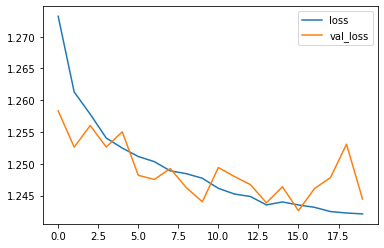

In [41]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

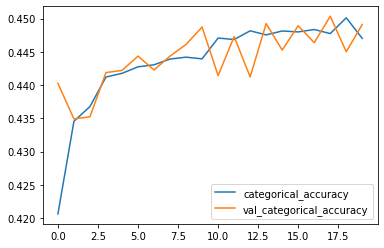

In [42]:
pd.DataFrame(history.history)[['categorical_accuracy', 'val_categorical_accuracy']].plot()

---

In [27]:
model = models.load_model('./saved_model/Ali_switch_0524_F.h5')

In [28]:
df_table_testday = pd.concat(lt_df[4:], ignore_index=True)

In [29]:
# df_table_testday.drop_duplicates(inplace=True, ignore_index=True)

In [30]:
df_table_testday.describe()

,uid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len
count,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00
mean,500967.22,2583610.90,2689736.19,2583089.62,2690628.35,30.08,32.00,47.66,50.02,1.05,14.56
std,293803.33,1475124.52,1398041.57,1469947.44,1396877.05,28.00,27.84,27.97,28.79,1.06,17.84
min,16.00,72.00,5064.00,608.00,5064.00,1.00,1.00,1.00,1.00,0.00,1.00
25%,247868.25,1320123.00,1464116.00,1341094.75,1464116.00,6.00,8.00,24.00,25.00,0.00,3.00
50%,494055.00,2598281.00,2520377.00,2587102.50,2520377.00,20.00,24.00,46.00,50.00,1.00,8.00
75%,756595.00,3849172.00,3747017.00,3853076.00,3775100.50,49.00,51.00,71.00,75.00,2.00,19.00
max,1017940.00,5162674.00,5150761.00,5163006.00,5144469.00,99.00,99.00,99.00,99.00,3.00,343.00


In [31]:
df_table_testday = pd.merge(df_table_testday, pd.DataFrame(table_grby.size()), on=['target_iid'], how='left')

In [32]:
df_table_testday.rename(columns = {0:'occur'}, inplace=True)

In [33]:
df_table_testday['occur'].fillna(1, inplace=True)

In [34]:
# model.predict(np.append(model_w2v.wv['2063176'], 0.3).reshape(1, -1))[0]

In [35]:
# np.argmax(model.predict(np.append(model_w2v.wv['2063176'], 0.3).reshape(1, -1))[0])

In [36]:
# sum(model.predict(np.append(model_w2v.wv['2063176'], 0.3).reshape(1, -1))[0])

In [37]:
def pred(df):
    if str(df['target_iid']) not in model_w2v.wv:
        return 0
    else:
        return np.argmax(model.predict(np.append(model_w2v.wv[str(df['target_iid'])], df['occur_log']).reshape(1, -1))[0])

In [38]:
def label_switch(df):
    label = df['pred']
    rank = None
    if label == 0:
        rank = df['knn_rank']
    elif label == 1:
        rank = df['NN_rank']
    elif label == 2:
        rank = df['DIN_rank']
    elif label == 3:
        rank = df['DIEN_rank']
    return rank

In [39]:
max_occur = max(df_table_testday['occur'])

In [40]:
df_table_testday['occur_log'] = df_table_testday.apply(lambda df: log10(df['occur'])/log10(max_occur), axis=1)

In [43]:
df_table_testday['pred'] = df_table_testday.apply(pred, axis=1)

In [44]:
df_table_testday['pred_rank'] = df_table_testday.apply(label_switch, axis=1)

In [45]:
df_table_testday.describe()

,uid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len,occur,occur_log,pred,pred_rank
count,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00,57168.00
mean,500967.22,2583610.90,2689736.19,2583089.62,2690628.35,30.08,32.00,47.66,50.02,1.05,14.56,14.39,0.32,0.28,27.75
std,293803.33,1475124.52,1398041.57,1469947.44,1396877.05,28.00,27.84,27.97,28.79,1.06,17.84,25.61,0.27,0.45,26.96
min,16.00,72.00,5064.00,608.00,5064.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00
25%,247868.25,1320123.00,1464116.00,1341094.75,1464116.00,6.00,8.00,24.00,25.00,0.00,3.00,1.00,0.00,0.00,5.00
50%,494055.00,2598281.00,2520377.00,2587102.50,2520377.00,20.00,24.00,46.00,50.00,1.00,8.00,5.00,0.31,0.00,18.00
75%,756595.00,3849172.00,3747017.00,3853076.00,3775100.50,49.00,51.00,71.00,75.00,2.00,19.00,16.00,0.53,1.00,44.00
max,1017940.00,5162674.00,5150761.00,5163006.00,5144469.00,99.00,99.00,99.00,99.00,3.00,343.00,179.00,1.00,1.00,99.00


In [46]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(df_table_testday['label'].tolist(),df_table_testday['pred'].tolist()))

              precision    recall  f1-score   support

           0       0.44      0.80      0.56     22539
           1       0.44      0.41      0.42     17566
           2       0.00      0.00      0.00      8632
           3       0.00      0.00      0.00      8431

    accuracy                           0.44     57168
   macro avg       0.22      0.30      0.25     57168
weighted avg       0.31      0.44      0.35     57168



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
df_table_testday

,uid,hist_iid,hist_cid,target_iid,target_cid,next_iid,next_cid,knn_rank,NN_rank,DIN_rank,DIEN_rank,label,hist_len,train_label,occur,occur_log,pred,pred_rank
0,16,"[1068105, 2298434, 1993229, 440376, 2790322, 3...","[3248072, 3248072, 3248072, 4234389, 4234389, ...",1994146,3673501,3715112,883960,2.00,1,5.00,46,1,14,"[0.0, 1.0, 0.0, 0.0]",1.00,0.00,0,2.00
1,263,"[3133804, 5059894, 4749737]","[5046388, 2945933, 2096639]",4749737,2096639,3119053,2096639,73.00,36,54.00,11,3,3,"[0.0, 0.0, 0.0, 1.0]",12.00,0.48,0,73.00
2,358,"[3450505, 4750478, 2017785, 677155, 10108, 831...","[2739327, 2739327, 2739327, 4756105, 1464116, ...",4788857,2355072,5133563,2355072,20.00,96,64.00,31,0,7,"[1.0, 0.0, 0.0, 0.0]",1.00,0.00,0,20.00
3,480,"[1204358, 4817032, 1706966, 438788, 4255492, 1...","[2131531, 3607361, 2520771, 149192, 982926, 48...",524337,4801426,4320227,235534,94.00,3,48.00,75,1,7,"[0.0, 1.0, 0.0, 0.0]",1.00,0.00,0,94.00
4,490,"[4654918, 4698586, 1035871, 1677530, 947409, 4...","[245312, 5053508, 2131531, 2131531, 2131531, 9...",582970,1834026,3031863,1834026,1.00,4,46.00,16,0,27,"[1.0, 0.0, 0.0, 0.0]",21.00,0.59,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57163,1017814,"[11973, 3251377]","[883960, 2733371]",3251377,2733371,2944225,2733371,38.00,28,3.00,27,2,2,"[0.0, 0.0, 1.0, 0.0]",27.00,0.64,0,38.00
57164,1017891,"[1239068, 2584880]","[4145813, 1994940]",2584880,1994940,1980098,1994940,1.00,17,64.00,11,0,2,"[1.0, 0.0, 0.0, 0.0]",4.00,0.27,0,1.00
57165,1017898,"[2275478, 3811147, 2275478, 4852928]","[4758477, 4758477, 4758477, 4697972]",4852928,4697972,4632023,4697972,37.00,6,86.00,74,1,4,"[0.0, 1.0, 0.0, 0.0]",5.00,0.31,0,37.00
57166,1017934,"[4124393, 3303427]","[1859277, 570735]",3303427,570735,4847230,570735,21.00,23,64.00,34,0,2,"[1.0, 0.0, 0.0, 0.0]",17.00,0.55,1,23.00


In [462]:
y_train.tolist().count([0, 0, 0, 1])

7706

---

In [71]:
len(df_table_testday[df_table_testday['knn_rank'] <= 20])

28607

In [72]:
len(df_table_testday[df_table_testday['NN_rank'] <= 20])

26275

In [73]:
len(df_table_testday[df_table_testday['DIN_rank'] <= 20])

12064

In [74]:
len(df_table_testday[df_table_testday['DIEN_rank'] <= 20])

11525

In [75]:
len(df_table_testday[df_table_testday['pred_rank'] <= 20])

30680